In [12]:
! pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
! pip install transformers datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# from huggingface_hub import notebook_login

# notebook_login()

In [15]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [16]:
import transformers

print(transformers.__version__)

4.30.2


In [17]:

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import pandas as pd
from transformers import AutoTokenizer
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import glob
import collections

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [9]:
dataset_filepaths = 'gdrive/MyDrive/Normalized data/Normalized Beinolmelal/'
label = "Beinolmelal"
df = pd.DataFrame(columns = ['text', 'label'])

for i in range(1, 3995):
    text_file = open(dataset_filepaths+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    df = df.append({'text':text, 'label':label}, ignore_index = True)
print(df.info())


#df = df.append({'Name' : 'Tommy', 'Scores' : 17, 'Questions' : 220},)

#for filepath in tqdm.tqdm(dataset_filepaths):
#    df = pd.read_csv(filepath)
#    print(df)

# file_list = pd.read_csv(folder_path + "1.txt", sep=" ")
# # glob.glob(folder_path + "/*.txt")
# print(file_list)
# main_dataframe = pd.DataFrame(pd.read_table(file_list[0]))

# for i in range(1,len(file_list)):
#     data = pd.read_table(file_list[i])
#     df = pd.DataFrame(data)
#     main_dataframe = pd.concat([main_dataframe, df], axis = 1)

Streaming output truncated to the last 5000 lines.
<ipython-input-9-1a7d6d464736>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-9-1a7d6d464736>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-9-1a7d6d464736>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-9-1a7d6d464736>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994 entries, 0 to 3993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3994 non-null   object
 1   label   3994 non-null   object
dtypes: object(2)
memory usage: 62.5+ KB
None


<ipython-input-9-1a7d6d464736>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


In [10]:
dataset_filepaths = 'gdrive/MyDrive/Normalized data/Normalized Ejtemaee/'
label = "Ejtemaee"

for i in range(1, 4001):
    text_file = open(dataset_filepaths+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    df = df.append({'text':text, 'label':label}, ignore_index = True)
    print(i)
print(df.info())

<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


4


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


5


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


6


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


7


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


8


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


9


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


10


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


11


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


12


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


13


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


14


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


15


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


16


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


17


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


18


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


19


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


20


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


21


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


22


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


23


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


24


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


25


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


26


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


27


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


28


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


29


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


30


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


31


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


32


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


33


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


34


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


35


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


36


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


37


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


38


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


39


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


40


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


41


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


42


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


43


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


44


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


45


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


46


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


47


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


48


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


49


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


50


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


51


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


52


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


53


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


54


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


55


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


56


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


57


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


58


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


59


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


60


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


61


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


62


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


63


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


64


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


65


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


66


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


67


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


68


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


69


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


70


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


71


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


72


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


73


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


74


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


75


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


76


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


77


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


78


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


79


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


80


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


81


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


82


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


83


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


84


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


85


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


86


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


87


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


88


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


89


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


90


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


91


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


92


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


93


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


94


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


95


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


96


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


97


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


98


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


99


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


100


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


101


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


102


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


103


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


104


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


105


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


106


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


107


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


108


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


109


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


110


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


111


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


112


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


113


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


114


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


115


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


116


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


117


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


118


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


119


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


120


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


121


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


122


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


123


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


124


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


125


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


126


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


127


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


128


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


129


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


130


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


131


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


132


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


133


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


134


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


135


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


136


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


137


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


138


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


139


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


140


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


141


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


142


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


143


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


144


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


145


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


146


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


147


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


148


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


149


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


150


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


151


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


152


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


153


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


154


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


155


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


156


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


157


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


158


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


159


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


160


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


161


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


162


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


163


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


164


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


165


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


166


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


167


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


168


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


169


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


170


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


171


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


172


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


173


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


174


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


175


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


176


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


177


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


178


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


179


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


180


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


181


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


182


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


183


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


184


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


185


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


186


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


187


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


188


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


189


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


190


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


191


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


192


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


193


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


194


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


195


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


196


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


197


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


198


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


199


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


200


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


201


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


202


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


203


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


204


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


205


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


206


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


207


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


208


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


209


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


210


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


211


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


212


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


213


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


214


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


215


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


216


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


217


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


218


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


219


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


220


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


221


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


222


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


223


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


224


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


225


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


226


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


227


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


228


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


229


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


230


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


231


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


232


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


233


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


234


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


235


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


236


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


237


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


238


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


239


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


240


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


241


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


242


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


243


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


244


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


245


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


246


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


247


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


248


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


249


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


250


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


251


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


252


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


253


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


254


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


255


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


256


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


257


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


258


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


259


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


260


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


261


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


262


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


263


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


264


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


265


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


266


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


267


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


268


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


269


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


270


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


271


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


272


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


273


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


274


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


275


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


276


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


277


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


278


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


279


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


280


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


281


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


282


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


283


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


284


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


285


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


286


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


287


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


288


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


289


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


290


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


291


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


292


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


293


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


294


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


295


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


296


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


297


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


298


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


299


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


300


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


301


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


302


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


303


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


304


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


305


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


306


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


307


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


308


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


309


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


310


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


311


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


312


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


313


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


314


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


315


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


316


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


317


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


318


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


319


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


320


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


321


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


322


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


323


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


324


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


325


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


326


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


327


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


328


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


329


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


330


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


331


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


332


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


333


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


334


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


335


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


336


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


337


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


338


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


339


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


340


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


341


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


342


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


343


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


344


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


345


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


346


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


347


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


348


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


349


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


350


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


351


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


352


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


353


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


354


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


355


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


356


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


357


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


358


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


359


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


360


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


361


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


362


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


363


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


364


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


365


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


366


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


367


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


368


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


369


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


370


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


371


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


372


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


373


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


374


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


375


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


376


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


377


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


378


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


379


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


380


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


381


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


382


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


383


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


384


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


385


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


386


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


387


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


388


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


389


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


390


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


391


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


392


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


393


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


394


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


395


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


396


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


397


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


398


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


399


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


400


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


401


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


402


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


403


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


404


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


405


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


406


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


407


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


408


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


409


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


410


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


411


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


412


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


413


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


414


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


415


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


416


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


417


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


418


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


419


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


420


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


421


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


422


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


423


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


424


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


425


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


426


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


427


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


428


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


429


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


430


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


431


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


432


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


433


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


434


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


435


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


436


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


437


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


438


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


439


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


440


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


441


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


442


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


443


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


444


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


445


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


446


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


447


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


448


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


449


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


450


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


451


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


452


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


453


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


454


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


455


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


456


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


457


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


458


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


459


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


460


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


461


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


462


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


463


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


464


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


465


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


466


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


467


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


468


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


469


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


470


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


471


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


472


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


473


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


474


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


475


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


476


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


477


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


478


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


479


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


480


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


481


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


482


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


483


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


484


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


485


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


486


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


487


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


488


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


489


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


490


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


491


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


492


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


493


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


494


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


495


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


496


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


497


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


498


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


499


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


500


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


501


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


502


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


503


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


504


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


505


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


506


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


507


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


508


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


509


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


510


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


511


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


512


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


513


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


514


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


515


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


516


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


517


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


518


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


519


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


520


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


521


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


522


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


523


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


524


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


525


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


526


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


527


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


528


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


529


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


530


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


531


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


532


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


533


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


534


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


535


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


536


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


537


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


538


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


539


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


540


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


541


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


542


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


543


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


544


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


545


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


546


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


547


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


548


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


549


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


550


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


551


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


552


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


553


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


554


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


555


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


556


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


557


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


558


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


559


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


560


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


561


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


562


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


563


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


564


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


565


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


566


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


567


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


568


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


569


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


570


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


571


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


572


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


573


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


574


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


575


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


576


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


577


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


578


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


579


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


580


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


581


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


582


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


583


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


584


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


585


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


586


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


587


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


588


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


589


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


590


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


591


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


592


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


593


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


594


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


595


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


596


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


597


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


598


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


599


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


600


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


601


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


602


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


603


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


604


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


605


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


606


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


607


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


608


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


609


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


610


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


611


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


612


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


613


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


614


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


615


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


616


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


617


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


618


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


619


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


620


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


621


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


622


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


623


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


624


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


625


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


626


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


627


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


628


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


629


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


630


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


631


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


632


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


633


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


634


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


635


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


636


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


637


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


638


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


639


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


640


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


641


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


642


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


643


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


644


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


645


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


646


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


647


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


648


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


649


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


650


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


651


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


652


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


653


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


654


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


655


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


656


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


657


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


658


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


659


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


660


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


661


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


662


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


663


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


664


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


665


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


666


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


667


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


668


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


669


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


670


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


671


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


672


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


673


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


674


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


675


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


676


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


677


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


678


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


679


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


680


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


681


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


682


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


683


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


684


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


685


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


686


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


687


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


688


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


689


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


690


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


691


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


692


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


693


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


694


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


695


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


696


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


697


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


698


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


699


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


700


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


701


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


702


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


703


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


704


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


705


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


706


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


707


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


708


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


709


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


710


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


711


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


712


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


713


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


714


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


715


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


716


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


717


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


718


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


719


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


720


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


721


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


722


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


723


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


724


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


725


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


726


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


727


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


728


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


729


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


730


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


731


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


732


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


733


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


734


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


735


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


736


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


737


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


738


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


739


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


740


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


741


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


742


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


743


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


744


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


745


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


746


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


747


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


748


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


749


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


750


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


751


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


752


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


753


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


754


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


755


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


756


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


757


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


758


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


759


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


760


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


761


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


762


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


763


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


764


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


765


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


766


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


767


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


768


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


769


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


770


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


771


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


772


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


773


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


774


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


775


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


776


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


777


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


778


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


779


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


780


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


781


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


782


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


783


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


784


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


785


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


786


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


787


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


788


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


789


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


790


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


791


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


792


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


793


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


794


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


795


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


796


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


797


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


798


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


799


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


800


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


801


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


802


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


803


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


804


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


805


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


806


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


807


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


808


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


809


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


810


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


811


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


812


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


813


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


814


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


815


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


816


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


817


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


818


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


819


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


820


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


821


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


822


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


823


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


824


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


825


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


826


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


827


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


828


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


829


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


830


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


831


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


832


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


833


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


834


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


835


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


836


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


837


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


838


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


839


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


840


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


841


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


842


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


843


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


844


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


845


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


846


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


847


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


848


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


849


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


850


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


851


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


852


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


853


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


854


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


855


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


856


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


857


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


858


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


859


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


860


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


861


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


862


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


863


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


864


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


865


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


866


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


867


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


868


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


869


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


870


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


871


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


872


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


873


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


874


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


875


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


876


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


877


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


878


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


879


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


880


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


881


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


882


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


883


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


884


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


885


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


886


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


887


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


888


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


889


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


890


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


891


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


892


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


893


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


894


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


895


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


896


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


897


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


898


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


899


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


900


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


901


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


902


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


903


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


904


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


905


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


906


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


907


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


908


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


909


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


910


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


911


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


912


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


913


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


914


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


915


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


916


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


917


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


918


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


919


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


920


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


921


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


922


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


923


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


924


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


925


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


926


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


927


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


928


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


929


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


930


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


931


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


932


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


933


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


934


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


935


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


936


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


937


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


938


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


939


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


940


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


941


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


942


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


943


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


944


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


945


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


946


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


947


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


948


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


949


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


950


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


951


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


952


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


953


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


954


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


955


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


956


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


957


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


958


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


959


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


960


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


961


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


962


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


963


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


964


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


965


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


966


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


967


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


968


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


969


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


970


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


971


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


972


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


973


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


974


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


975


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


976


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


977


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


978


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


979


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


980


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


981


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


982


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


983


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


984


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


985


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


986


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


987


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


988


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


989


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


990


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


991


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


992


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


993


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


994


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


995


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


996


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


997


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


998


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


999


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1000


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1001


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1002


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1003


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1004


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1005


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1006


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1007


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1008


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1009


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1010


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1011


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1012


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1013


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1014


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1015


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1016


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1017


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1018


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1019


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1020


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1021


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1022


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1023


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1024


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1025


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1026


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1027


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1028


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1029


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1030


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1031


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1032


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1033


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1034


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1035


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1036


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1037


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1038


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1039


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1040


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1041


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1042


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1043


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1044


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1045


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1046


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1047


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1048


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1049


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1050


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1051


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1052


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1053


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1054


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1055


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1056


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1057


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1058


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1059


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1060


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1061


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1062


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1063


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1064


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1065


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1066


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1067


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1068


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1069


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1070


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1071


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1072


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1073


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1074


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1075


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1076


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1077


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1078


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1079


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1080


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1081


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1082


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1083


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1084


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1085


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1086


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1087


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1088


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1089


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1090


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1091


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1092


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1093


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1094


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1095


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1096


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1097


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1098


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1099


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1100


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1101


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1102


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1103


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1104


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1105


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1106


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1107


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1108


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1109


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1110


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1111


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1112


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1113


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1114


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1115


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1116


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1117


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1118


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1119


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1120


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1121


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1122


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1123


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1124


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1125


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1126


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1127


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1128


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1129


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1130


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1131


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1132


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1133


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1134


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1135


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1136


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1137


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1138


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1139


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1140


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1141


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1142


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1143


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1144


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1145


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1146


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1147


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1148


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1149


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1150


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1151


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1152


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1153


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1154


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1155


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1156


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1157


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1158


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1159


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1160


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1161


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1162


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1163


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1164


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1165


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1166


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1167


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1168


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1169


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1170


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1171


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1172


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1173


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1174


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1175


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1176


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1177


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1178


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1179


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1180


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1181


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1182


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1183


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1184


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1185


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1186


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1187


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1188


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1189


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1190


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1191


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1192


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1193


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1194


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1195


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1196


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1197


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1198


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1199


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1200


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1201


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1202


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1203


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1204


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1205


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1206


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1207


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1208


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1209


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1210


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1211


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1212


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1213


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1214


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1215


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1216


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1217


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1218


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1219


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1220


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1221


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1222


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1223


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1224


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1225


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1226


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1227


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1228


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1229


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1230


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1231


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1232


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1233


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1234


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1235


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1236


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1237


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1238


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1239


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1240


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1241


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1242


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1243


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1244


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1245


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1246


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1247


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1248


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1249


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1250


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1251


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1252


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1253


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1254


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1255


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1256


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1257


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1258


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1259


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1260


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1261


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1262


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1263


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1264


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1265


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1266


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1267


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1268


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1269


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1270


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1271


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1272


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1273


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1274


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1275


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1276


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1277


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1278


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1279


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1280


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1281


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1282


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1283


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1284


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1285


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1286


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1287


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1288


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1289


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1290


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1291


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1292


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1293


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1294


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1295


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1296


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1297


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1298


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1299


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1300


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1301


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1302


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1303


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1304


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1305


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1306


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1307


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1308


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1309


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1310


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1311


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1312


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1313


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1314


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1315


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1316


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1317


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1318


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1319


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1320


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1321


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1322


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1323


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1324


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1325


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1326


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1327


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1328


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1329


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1330


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1331


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1332


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1333


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1334


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1335


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1336


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1337


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1338


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1339


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1340


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1341


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1342


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1343


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1344


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1345


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1346


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1347


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1348


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1349


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1350


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1351


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1352


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1353


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1354


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1355


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1356


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1357


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1358


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1359


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1360


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1361


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1362


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1363


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1364


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1365


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1366


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1367


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1368


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1369


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1370


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1371


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1372


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1373


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1374


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1375


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1376


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1377


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1378


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1379


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1380


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1381


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1382


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1383


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1384


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1385


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1386


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1387


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1388


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1389


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1390


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1391


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1392


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1393


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1394


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1395


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1396


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1397


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1398


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1399


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1400


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1401


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1402


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1403


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1404


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1405


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1406


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1407


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1408


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1409


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1410


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1411


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1412


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1413


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1414


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1415


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1416


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1417


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1418


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1419


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1420


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1421


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1422


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1423


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1424


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1425


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1426


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1427


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1428


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1429


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1430


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1431


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1432


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1433


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1434


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1435


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1436


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1437


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1438


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1439


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1440


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1441


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1442


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1443


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1444


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1445


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1446


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1447


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1448


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1449


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1450


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1451


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1452


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1453


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1454


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1455


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1456


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1457


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1458


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1459


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1460


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1461


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1462


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1463


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1464


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1465


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1466


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1467


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1468


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1469


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1470


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1471


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1472


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1473


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1474


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1475


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1476


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1477


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1478


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1479


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1480


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1481


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1482


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1483


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1484


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1485


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1486


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1487


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1488


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1489


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1490


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1491


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1492


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1493


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1494


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1495


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1496


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1497


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1498


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1499


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1500


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1501


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1502


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1503


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1504


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1505


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1506


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1507


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1508


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1509


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1510


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1511


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1512


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1513


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1514


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1515


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1516


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1517


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1518


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1519


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1520


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1521


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1522


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1523


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1524


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1525


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1526


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1527


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1528


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1529


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1530


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1531


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1532


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1533


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1534


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1535


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1536


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1537


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1538


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1539


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1540


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1541


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1542


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1543


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1544


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1545


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1546


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1547


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1548


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1549


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1550


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1551


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1552


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1553


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1554


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1555


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1556


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1557


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1558


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1559


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1560


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1561


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1562


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1563


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1564


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1565


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1566


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1567


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1568


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1569


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1570


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1571


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1572


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1573


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1574


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1575


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1576


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1577


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1578


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1579


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1580


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1581


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1582


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1583


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1584


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1585


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1586


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1587


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1588


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1589


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1590


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1591


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1592


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1593


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1594


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1595


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1596


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1597


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1598


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1599


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1600


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1601


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1602


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1603


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1604


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1605


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1606


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1607


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1608


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1609


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1610


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1611


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1612


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1613


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1614


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1615


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1616


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1617


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1618


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1619


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1620


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1621


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1622


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1623


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1624


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1625


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1626


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1627


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1628


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1629


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1630


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1631


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1632


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1633


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1634


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1635


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1636


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1637


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1638


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1639


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1640


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1641


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1642


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1643


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1644


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1645


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1646


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1647


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1648


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1649


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1650


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1651


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1652


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1653


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1654


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1655


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1656


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1657


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1658


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1659


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1660


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1661


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1662


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1663


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1664


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1665


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1666


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1667


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1668


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1669


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1670


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1671


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1672


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1673


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1674


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1675


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1676


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1677


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1678


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1679


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1680


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1681


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1682


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1683


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1684


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1685


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1686


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1687


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1688


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1689


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1690


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1691


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1692


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1693


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1694


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1695


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1696


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1697


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1698


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1699


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1700


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1701


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1702


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1703


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1704


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1705


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1706


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1707


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1708


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1709


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1710


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1711


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1712


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1713


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1714


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1715


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1716


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1717


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1718


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1719


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1720


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1721


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1722


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1723


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1724


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1725


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1726


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1727


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1728


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1729


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1730


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1731


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1732


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1733


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1734


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1735


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1736


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1737


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1738


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1739


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1740


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1741


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1742


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1743


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1744


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1745


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1746


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1747


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1748


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1749


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1750


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1751


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1752


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1753


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1754


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1755


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1756


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1757


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1758


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1759


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1760


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1761


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1762


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1763


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1764


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1765


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1766


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1767


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1768


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1769


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1770


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1771


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1772


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1773


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1774


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1775


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1776


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1777


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1778


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1779


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1780


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1781


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1782


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1783


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1784


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1785


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1786


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1787


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1788


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1789


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1790


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1791


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1792


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1793


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1794


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1795


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1796


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1797


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1798


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1799


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1800


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1801


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1802


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1803


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1804


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1805


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1806


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1807


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1808


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1809


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1810


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1811


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1812


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1813


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1814


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1815


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1816


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1817


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1818


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1819


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1820


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1821


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1822


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1823


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1824


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1825


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1826


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1827


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1828


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1829


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1830


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1831


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1832


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1833


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1834


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1835


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1836


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1837


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1838


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1839


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1840


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1841


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1842


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1843


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1844


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1845


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1846


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1847


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1848


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1849


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1850


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1851


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1852


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1853


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1854


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1855


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1856


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1857


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1858


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1859


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1860


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1861


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1862


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1863


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1864


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1865


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1866


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1867


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1868


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1869


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1870


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1871


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1872


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1873


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1874


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1875


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1876


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1877


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1878


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1879


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1880


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1881


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1882


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1883


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1884


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1885


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1886


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1887


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1888


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1889


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1890


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1891


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1892


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1893


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1894


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1895


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1896


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1897


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1898


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1899


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1900


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1901


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1902


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1903


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1904


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1905


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1906


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1907


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1908


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1909


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1910


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1911


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1912


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1913


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1914


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1915


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1916


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1917


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1918


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1919


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1920


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1921


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1922


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1923


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1924


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1925


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1926


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1927


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1928


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1929


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1930


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1931


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1932


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1933


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1934


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1935


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1936


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1937


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1938


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1939


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1940


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1941


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1942


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1943


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1944


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1945


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1946


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1947


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1948


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1949


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1950


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1951


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1952


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1953


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1954


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1955


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1956


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1957


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1958


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1959


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1960


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1961


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1962


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1963


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1964


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1965


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1966


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1967


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1968


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1969


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1970


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1971


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1972


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1973


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1974


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1975


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1976


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1977


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1978


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1979


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1980


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1981


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1982


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1983


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1984


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1985


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1986


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1987


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1988


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1989


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1990


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1991


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1992


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1993


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1994


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1995


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1996


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1997


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1998


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


1999


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2000


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2001


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2002


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2003


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2004


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2005


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2006


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2007


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2008


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2009


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2010


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2011


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2012


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2013


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2014


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2015


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2016


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2017


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2018


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2019


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2020


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2021


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2022


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2023


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2024


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2025


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2026


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2027


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2028


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2029


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2030


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2031


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2032


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2033


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2034


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2035


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2036


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2037


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2038


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2039


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2040


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2041


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2042


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2043


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2044


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2045


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2046


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2047


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2048


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2049


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2050


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2051


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2052


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2053


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2054


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2055


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2056


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2057


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2058


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2059


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2060


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2061


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2062


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2063


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2064


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2065


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2066


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2067


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2068


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2069


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2070


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2071


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2072


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2073


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2074


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2075


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2076


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2077


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2078


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2079


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2080


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2081


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2082


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2083


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2084


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2085


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2086


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2087


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2088


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2089


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2090


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2091


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2092


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2093


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2094


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2095


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2096


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2097


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2098


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2099


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2100


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2101


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2102


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2103


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2104


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2105


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2106


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2107


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2108


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2109


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2110


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2111


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2112


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2113


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2114


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2115


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2116


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2117


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2118


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2119


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2120


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2121


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2122


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2123


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2124


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2125


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2126


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2127


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2128


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2129


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2130


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2131


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2132


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2133


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2134


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2135


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2136


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2137


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2138


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2139


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2140


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2141


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2142


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2143


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2144


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2145


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2146


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2147


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2148


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2149


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2150


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2151


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2152


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2153


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2154


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2155


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2156


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2157


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2158


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2159


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2160


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2161


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2162


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2163


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2164


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2165


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2166


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2167


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2168


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2169


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2170


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2171


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2172


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2173


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2174


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2175


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2176


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2177


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2178


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2179


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2180


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2181


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2182


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2183


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2184


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2185


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2186


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2187


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2188


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2189


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2190


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2191


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2192


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2193


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2194


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2195


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2196


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2197


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2198


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2199


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2200


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2201


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2202


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2203


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2204


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2205


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2206


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2207


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2208


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2209


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2210


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2211


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2212


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2213


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2214


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2215


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2216


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2217


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2218


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2219


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2220


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2221


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2222


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2223


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2224


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2225


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2226


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2227


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2228


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2229


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2230


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2231


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2232


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2233


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2234


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2235


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2236


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2237


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2238


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2239


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2240


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2241


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2242


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2243


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2244


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2245


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2246


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2247


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2248


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2249


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2250


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2251


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2252


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2253


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2254


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2255


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2256


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2257


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2258


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2259


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2260


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2261


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2262


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2263


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2264


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2265


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2266


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2267


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2268


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2269


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2270


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2271


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2272


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2273


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2274


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2275


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2276


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2277


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2278


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2279


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2280


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2281


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2282


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2283


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2284


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2285


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2286


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2287


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2288


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2289


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2290


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2291


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2292


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2293


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2294


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2295


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2296


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2297


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2298


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2299


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2300


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2301


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2302


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2303


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2304


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2305


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2306


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2307


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2308


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2309


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2310


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2311


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2312


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2313


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2314


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2315


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2316


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2317


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2318


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2319


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2320


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2321


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2322


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2323


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2324


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2325


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2326


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2327


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2328


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2329


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2330


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2331


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2332


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2333


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2334


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2335


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2336


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2337


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2338


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2339


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2340


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2341


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2342


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2343


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2344


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2345


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2346


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2347


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2348


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2349


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2350


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2351


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2352


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2353


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2354


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2355


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2356


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2357


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2358


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2359


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2360


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2361


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2362


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2363


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2364


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2365


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2366


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2367


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2368


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2369


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2370


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2371


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2372


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2373


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2374


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2375


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2376


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2377


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2378


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2379


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2380


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2381


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2382


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2383


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2384


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2385


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2386


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2387


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2388


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2389


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2390


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2391


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2392


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2393


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2394


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2395


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2396


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2397


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2398


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2399


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2400


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2401


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2402


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2403


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2404


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2405


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2406


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2407


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2408


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2409


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2410


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2411


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2412


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2413


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2414


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2415


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2416


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2417


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2418


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2419


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2420


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2421


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2422


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2423


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2424


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2425


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2426


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2427


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2428


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2429


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2430


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2431


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2432


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2433


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2434


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2435


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2436


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2437


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2438


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2439


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2440


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2441


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2442


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2443


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2444


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2445


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2446


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2447


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2448


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2449


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2450


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2451


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2452


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2453


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2454


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2455


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2456


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2457


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2458


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2459


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2460


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2461


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2462


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2463


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2464


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2465


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2466


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2467


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2468


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2469


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2470


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2471


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2472


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2473


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2474


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2475


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2476


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2477


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2478


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2479


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2480


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2481


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2482


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2483


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2484


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2485


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2486


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2487


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2488


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2489


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2490


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2491


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2492


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2493


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2494


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2495


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2496


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2497


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2498


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2499


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2500


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2501


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2502


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2503


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2504


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2505


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2506


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2507


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2508


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2509


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2510


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2511


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2512


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2513


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2514


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2515


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2516


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2517


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2518


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2519


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2520


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2521


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2522


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2523


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2524


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2525


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2526


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2527


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2528


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2529


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2530


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2531


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2532


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2533


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2534


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2535


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2536


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2537


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2538


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2539


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2540


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2541


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2542


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2543


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2544


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2545


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2546


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2547


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2548


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2549


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2550


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2551


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2552


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2553


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2554


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2555


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2556


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2557


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2558


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2559


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2560


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2561


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2562


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2563


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2564


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2565


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2566


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2567


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2568


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2569


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2570


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2571


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2572


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2573


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2574


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2575


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2576


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2577


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2578


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2579


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2580


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2581


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2582


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2583


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2584


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2585


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2586


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2587


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2588


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2589


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2590


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2591


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2592


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2593


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2594


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2595


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2596


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2597


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2598


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2599


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2600


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2601


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2602


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2603


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2604


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2605


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2606


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2607


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2608


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2609


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2610


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2611


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2612


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2613


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2614


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2615


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2616


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2617


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2618


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2619


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2620


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2621


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2622


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2623


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2624


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2625


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2626


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2627


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2628


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2629


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2630


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2631


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2632


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2633


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2634


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2635


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2636


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2637


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2638


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2639


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2640


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2641


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2642


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2643


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2644


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2645


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2646


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2647


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2648


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2649


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2650


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2651


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2652


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2653


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2654


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2655


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2656


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2657


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2658


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2659


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2660


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2661


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2662


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2663


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2664


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2665


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2666


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2667


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2668


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2669


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2670


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2671


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2672


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2673


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2674


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2675


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2676


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2677


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2678


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2679


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2680


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2681


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2682


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2683


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2684


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2685


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2686


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2687


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2688


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2689


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2690


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2691


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2692


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2693


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2694


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2695


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2696


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2697


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2698


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2699


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2700


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2701


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2702


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2703


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2704


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2705


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2706


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2707


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2708


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2709


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2710


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2711


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2712


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2713


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2714


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2715


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2716


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2717


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2718


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2719


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2720


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2721


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2722


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2723


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2724


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2725


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2726


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2727


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2728


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2729


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2730


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2731


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2732


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2733


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2734


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2735


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2736


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2737


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2738


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2739


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2740


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2741


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2742


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2743


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2744


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2745


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2746


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2747


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2748


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2749


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2750


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2751


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2752


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2753


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2754


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2755


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2756


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2757


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2758


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2759


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2760


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2761


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2762


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2763


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2764


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2765


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2766


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2767


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2768


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2769


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2770


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2771


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2772


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2773


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2774


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2775


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2776


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2777


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2778


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2779


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2780


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2781


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2782


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2783


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2784


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2785


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2786


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2787


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2788


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2789


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2790


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2791


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2792


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2793


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2794


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2795


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2796


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2797


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2798


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2799


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2800


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2801


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2802


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2803


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2804


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2805


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2806


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2807


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2808


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2809


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2810


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2811


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2812


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2813


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2814


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2815


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2816


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2817


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2818


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2819


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2820


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2821


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2822


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2823


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2824


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2825


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2826


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2827


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2828


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2829


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2830


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2831


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2832


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2833


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2834


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2835


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2836


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2837


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2838


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2839


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2840


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2841


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2842


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2843


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2844


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2845


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2846


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2847


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2848


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2849


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2850


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2851


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2852


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2853


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2854


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2855


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2856


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2857


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2858


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2859


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2860


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2861


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2862


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2863


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2864


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2865


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2866


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2867


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2868


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2869


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2870


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2871


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2872


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2873


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2874


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2875


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2876


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2877


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2878


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2879


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2880


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2881


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2882


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2883


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2884


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2885


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2886


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2887


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2888


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2889


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2890


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2891


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2892


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2893


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2894


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2895


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2896


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2897


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2898


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2899


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2900


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2901


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2902


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2903


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2904


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2905


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2906


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2907


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2908


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2909


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2910


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2911


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2912


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2913


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2914


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2915


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2916


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2917


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2918


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2919


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2920


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2921


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2922


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2923


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2924


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2925


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2926


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2927


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2928


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2929


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2930


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2931


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2932


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2933


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2934


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2935


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2936


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2937


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2938


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2939


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2940


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2941


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2942


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2943


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2944


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2945


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2946


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2947


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2948


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2949


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2950


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2951


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2952


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2953


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2954


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2955


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2956


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2957


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2958


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2959


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2960


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2961


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2962


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2963


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2964


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2965


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2966


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2967


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2968


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2969


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2970


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2971


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2972


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2973


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2974


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2975


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2976


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2977


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2978


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2979


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2980


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2981


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2982


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2983


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2984


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2985


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2986


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2987


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2988


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2989


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2990


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2991


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2992


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2993


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2994


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2995


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2996


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2997


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2998


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


2999


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3000


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3001


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3002


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3003


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3004


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3005


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3006


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3007


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3008


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3009


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3010


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3011


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3012


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3013


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3014


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3015


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3016


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3017


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3018


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3019


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3020


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3021


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3022


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3023


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3024


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3025


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3026


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3027


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3028


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3029


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3030


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3031


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3032


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3033


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3034


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3035


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3036


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3037


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3038


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3039


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3040


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3041


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3042


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3043


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3044


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3045


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3046


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3047


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3048


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3049


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3050


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3051


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3052


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3053


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3054


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3055


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3056


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3057


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3058


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3059


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3060


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3061


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3062


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3063


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3064


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3065


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3066


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3067


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3068


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3069


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3070


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3071


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3072


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3073


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3074


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3075


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3076


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3077


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3078


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3079


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3080


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3081


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3082


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3083


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3084


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3085


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3086


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3087


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3088


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3089


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3090


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3091


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3092


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3093


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3094


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3095


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3096


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3097


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3098


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3099


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3100


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3101


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3102


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3103


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3104


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3105


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3106


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3107


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3108


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3109


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3110


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3111


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3112


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3113


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3114


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3115


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3116


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3117


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3118


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3119


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3120


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3121


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3122


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3123


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3124


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3125


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3126


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3127


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3128


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3129


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3130


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3131


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3132


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3133


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3134


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3135


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3136


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3137


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3138


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3139


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3140


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3141


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3142


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3143


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3144


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3145


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3146


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3147


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3148


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3149


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3150


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3151


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3152


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3153


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3154


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3155


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3156


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3157


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3158


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3159


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3160


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3161


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3162


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3163


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3164


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3165


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3166


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3167


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3168


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3169


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3170


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3171


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3172


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3173


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3174


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3175


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3176


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3177


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3178


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3179


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3180


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3181


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3182


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3183


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3184


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3185


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3186


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3187


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3188


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3189


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3190


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3191


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3192


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3193


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3194


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3195


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3196


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3197


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3198


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3199


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3200


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3201


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3202


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3203


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3204


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3205


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3206


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3207


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3208


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3209


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3210


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3211


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3212


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3213


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3214


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3215


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3216


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3217


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3218


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3219


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3220


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3221


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3222


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3223


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3224


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3225


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3226


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3227


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3228


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3229


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3230


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3231


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3232


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3233


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3234


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3235


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3236


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3237


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3238


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3239


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3240


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3241


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3242


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3243


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3244


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3245


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3246


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3247


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3248


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3249


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3250


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3251


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3252


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3253


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3254


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3255


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3256


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3257


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3258


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3259


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3260


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3261


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3262


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3263


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3264


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3265


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3266


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3267


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3268


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3269


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3270


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3271


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3272


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3273


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3274


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3275


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3276


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3277


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3278


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3279


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3280


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3281


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3282


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3283


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3284


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3285


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3286


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3287


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3288


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3289


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3290


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3291


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3292


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3293


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3294


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3295


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3296


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3297


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3298


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3299


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3300


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3301


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3302


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3303


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3304


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3305


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3306


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3307


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3308


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3309


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3310


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3311


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3312


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3313


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3314


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3315


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3316


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3317


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3318


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3319


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3320


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3321


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3322


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3323


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3324


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3325


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3326


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3327


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3328


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3329


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3330


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3331


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3332


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3333


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3334


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3335


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3336


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3337


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3338


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3339


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3340


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3341


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3342


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3343


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3344


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3345


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3346


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3347


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3348


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3349


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3350


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3351


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3352


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3353


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3354


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3355


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3356


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3357


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3358


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3359


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3360


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3361


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3362


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3363


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3364


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3365


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3366


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3367


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3368


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3369


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3370


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3371


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3372


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3373


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3374


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3375


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3376


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3377


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3378


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3379


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3380


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3381


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3382


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3383


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3384


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3385


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3386


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3387


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3388


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3389


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3390


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3391


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3392


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3393


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3394


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3395


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3396


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3397


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3398


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3399


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3400


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3401


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3402


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3403


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3404


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3405


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3406


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3407


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3408


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3409


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3410


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3411


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3412


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3413


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3414


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3415


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3416


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3417


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3418


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3419


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3420


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3421


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3422


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3423


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3424


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3425


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3426


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3427


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3428


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3429


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3430


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3431


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3432


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3433


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3434


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3435


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3436


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3437


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3438


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3439


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3440


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3441


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3442


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3443


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3444


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3445


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3446


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3447


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3448


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3449


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3450


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3451


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3452


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3453


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3454


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3455


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3456


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3457


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3458


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3459


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3460


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3461


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3462


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3463


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3464


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3465


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3466


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3467


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3468


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3469


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3470


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3471


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3472


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3473


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3474


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3475


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3476


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3477


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3478


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3479


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3480


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3481


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3482


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3483


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3484


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3485


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3486


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3487


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3488


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3489


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3490


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3491


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3492


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3493


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3494


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3495


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3496


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3497


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3498


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3499


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3500


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3501


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3502


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3503


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3504


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3505


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3506


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3507


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3508


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3509


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3510


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3511


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3512


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3513


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3514


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3515


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3516


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3517


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3518


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3519


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3520


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3521


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3522


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3523


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3524


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3525


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3526


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3527


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3528


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3529


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3530


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3531


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3532


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3533


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3534


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3535


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3536


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3537


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3538


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3539


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3540


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3541


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3542


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3543


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3544


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3545


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3546


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3547


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3548


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3549


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3550


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3551


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3552


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3553


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3554


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3555


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3556


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3557


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3558


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3559


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3560


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3561


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3562


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3563


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3564


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3565


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3566


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3567


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3568


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3569


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3570


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3571


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3572


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3573


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3574


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3575


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3576


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3577


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3578


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3579


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3580


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3581


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3582


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3583


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3584


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3585


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3586


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3587


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3588


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3589


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3590


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3591


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3592


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3593


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3594


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3595


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3596


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3597


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3598


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3599


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3600


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3601


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3602


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3603


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3604


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3605


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3606


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3607


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3608


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3609


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3610


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3611


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3612


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3613


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3614


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3615


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3616


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3617


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3618


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3619


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3620


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3621


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3622


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3623


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3624


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3625


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3626


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3627


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3628


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3629


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3630


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3631


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3632


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3633


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3634


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3635


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3636


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3637


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3638


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3639


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3640


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3641


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3642


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3643


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3644


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3645


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3646


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3647


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3648


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3649


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3650


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3651


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3652


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3653


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3654


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3655


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3656


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3657


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3658


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3659


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3660


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3661


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3662


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3663


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3664


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3665


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3666


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3667


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3668


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3669


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3670


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3671


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3672


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3673


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3674


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3675


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3676


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3677


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3678


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3679


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3680


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3681


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3682


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3683


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3684


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3685


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3686


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3687


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3688


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3689


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3690


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3691


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3692


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3693


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3694


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3695


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3696


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3697


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3698


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3699


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3700


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3701


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3702


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3703


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3704


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3705


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3706


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3707


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3708


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3709


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3710


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3711


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3712


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3713


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3714


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3715


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3716


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3717


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3718


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3719


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3720


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3721


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3722


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3723


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3724


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3725


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3726


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3727


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3728


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3729


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3730


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3731


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3732


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3733


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3734


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3735


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3736


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3737


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3738


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3739


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3740


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3741


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3742


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3743


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3744


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3745


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3746


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3747


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3748


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3749


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3750


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3751


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3752


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3753


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3754


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3755


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3756


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3757


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3758


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3759


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3760


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3761


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3762


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3763


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3764


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3765


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3766


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3767


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3768


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3769


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3770


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3771


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3772


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3773


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3774


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3775


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3776


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3777


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3778


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3779


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3780


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3781


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3782


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3783


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3784


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3785


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3786


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3787


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3788


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3789


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3790


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3791


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3792


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3793


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3794


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3795


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3796


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3797


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3798


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3799


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3800


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3801


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3802


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3803


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3804


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3805


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3806


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3807


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3808


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3809


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3810


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3811


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3812


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3813


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3814


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3815


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3816


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3817


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3818


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3819


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3820


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3821


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3822


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3823


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3824


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3825


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3826


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3827


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3828


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3829


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3830


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3831


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3832


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3833


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3834


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3835


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3836


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3837


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3838


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3839


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3840


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3841


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3842


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3843


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3844


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3845


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3846


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3847


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3848


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3849


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3850


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3851


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3852


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3853


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3854


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3855


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3856


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3857


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3858


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3859


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3860


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3861


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3862


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3863


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3864


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3865


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3866


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3867


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3868


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3869


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3870


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3871


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3872


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3873


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3874


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3875


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3876


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3877


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3878


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3879


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3880


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3881


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3882


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3883


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3884


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3885


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3886


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3887


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3888


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3889


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3890


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3891


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3892


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3893


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3894


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3895


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3896


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3897


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3898


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3899


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3900


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3901


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3902


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3903


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3904


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3905


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3906


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3907


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3908


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3909


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3910


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3911


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3912


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3913


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3914


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3915


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3916


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3917


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3918


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3919


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3920


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3921


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3922


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3923


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3924


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3925


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3926


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3927


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3928


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3929


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3930


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3931


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3932


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3933


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3934


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3935


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3936


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3937


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3938


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3939


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3940


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3941


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3942


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3943


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3944


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3945


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3946


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3947


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3948


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3949


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3950


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3951


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3952


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3953


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3954


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3955


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3956


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3957


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3958


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3959


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3960


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3961


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3962


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3963


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3964


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3965


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3966


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3967


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3968


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3969


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3970


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3971


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3972


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3973


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3974


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3975


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3976


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3977


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3978


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3979


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3980


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3981


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3982


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3983


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3984


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3985


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3986


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3987


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3988


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3989


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3990


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3991


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3992


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3993


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3994


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3995


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3996


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3997


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3998


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


3999
4000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7994 non-null   object
 1   label   7994 non-null   object
dtypes: object(2)
memory usage: 125.0+ KB
None


<ipython-input-10-e9f4cf449bf4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


In [ ]:
dataset_filepaths = 'gdrive/MyDrive/Normalized data/Normalized Eghtesadi/'
label = "Eghtesadi"

for i in range(1, 3995):
    text_file = open(dataset_filepaths+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    df = df.append({'text':text, 'label':label}, ignore_index = True)
print(df.info())

In [22]:
dataset_filepaths = 'gdrive/MyDrive/Normalized data/Normalized Siasi/'
label = "Siasi"

for i in range(1, 3938):
    text_file = open(dataset_filepaths+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    df = df.append({'text':text, 'label':label}, ignore_index = True)
print(df.info())

Streaming output truncated to the last 5000 lines.
<ipython-input-22-e325af59de21>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-22-e325af59de21>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-22-e325af59de21>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-22-e325af59de21>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipyt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21150 entries, 0 to 21149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21150 non-null  object
 1   label   21150 non-null  object
dtypes: object(2)
memory usage: 330.6+ KB
None


<ipython-input-22-e325af59de21>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


In [23]:
dataset_filepaths = 'gdrive/MyDrive/Normalized data/Normalized ElmiVaDaneshghai/'
label = "ElmiVaDaneshgahi"

for i in range(1, 3983):
    text_file = open(dataset_filepaths+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    df = df.append({'text':text, 'label':label}, ignore_index = True)
print(df.info())

Streaming output truncated to the last 5000 lines.
<ipython-input-23-2117e1aa46cc>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-23-2117e1aa46cc>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-23-2117e1aa46cc>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-23-2117e1aa46cc>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipyt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25132 entries, 0 to 25131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25132 non-null  object
 1   label   25132 non-null  object
dtypes: object(2)
memory usage: 392.8+ KB
None


<ipython-input-23-2117e1aa46cc>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


In [19]:
dataset_filepaths = 'gdrive/MyDrive/Normalized data/Normalized FarhangHonarVaResane/'
label = "FarhangHonarVaResane"

for i in range(1, 4001):
    text_file = open(dataset_filepaths+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    df = df.append({'text':text, 'label':label}, ignore_index = True)
print(df.info())

Streaming output truncated to the last 5000 lines.
<ipython-input-19-e56c1da4568f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-19-e56c1da4568f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-19-e56c1da4568f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-19-e56c1da4568f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipyt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12213 entries, 0 to 12212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12213 non-null  object
 1   label   12213 non-null  object
dtypes: object(2)
memory usage: 191.0+ KB
None


<ipython-input-19-e56c1da4568f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


In [20]:
dataset_filepaths = 'gdrive/MyDrive/Normalized data/Normalized Varzeshi/'
label = "Varzeshi"

for i in range(1, 5001):
    text_file = open(dataset_filepaths+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    df = df.append({'text':text, 'label':label}, ignore_index = True)
print(df.info())

Streaming output truncated to the last 5000 lines.
<ipython-input-20-670db8f6360a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-20-670db8f6360a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-20-670db8f6360a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipython-input-20-670db8f6360a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)
<ipyt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17213 entries, 0 to 17212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17213 non-null  object
 1   label   17213 non-null  object
dtypes: object(2)
memory usage: 269.1+ KB
None


<ipython-input-20-670db8f6360a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text':text, 'label':label}, ignore_index = True)


In [21]:
"""
path = "E:/quera_Data/IR/Varzeshi/"
output_path = "E:/quera_Data/IR/Normalized Varzeshi/"
for i in range(1, 5001):
    text_file = open(path+str(i)+".txt", "r", encoding="utf-8")
    text = text_file.read()
    normalized_text = normalizer.normalize(text)
    output_file = open(output_path+str(i)+".txt", "w", encoding="utf-8")
    output_file.write(normalized_text)
    output_file.close()

"""

'\npath = "E:/quera_Data/IR/Varzeshi/"\noutput_path = "E:/quera_Data/IR/Normalized Varzeshi/"\nfor i in range(1, 5001):\n    text_file = open(path+str(i)+".txt", "r", encoding="utf-8")\n    text = text_file.read()\n    normalized_text = normalizer.normalize(text)\n    output_file = open(output_path+str(i)+".txt", "w", encoding="utf-8")\n    output_file.write(normalized_text)\n    output_file.close()\n\n'

Split Data

In [24]:
labels = ['Beinolmelal', 'Eghtesadi', 'Ejtemaee', 'ElmiVaDaneshgahi', 'FarhangHonarVaResane', 'Siasi', 'Varzeshi']
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(label2id)
print(id2label)

{'Beinolmelal': 0, 'Eghtesadi': 1, 'Ejtemaee': 2, 'ElmiVaDaneshgahi': 3, 'FarhangHonarVaResane': 4, 'Siasi': 5, 'Varzeshi': 6}
{0: 'Beinolmelal', 1: 'Eghtesadi', 2: 'Ejtemaee', 3: 'ElmiVaDaneshgahi', 4: 'FarhangHonarVaResane', 5: 'Siasi', 6: 'Varzeshi'}


In [25]:
df['label_id'] = df['label'].apply(lambda t: labels.index(t))

train, test = train_test_split(df, test_size = 0.15, random_state=1, stratify=df['label'])
train, valid = train_test_split(train, test_size = 0.1, random_state=1, stratify=train['label'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train, y_train = train['text'].values.tolist(), train['label'].values.tolist()
x_valid, y_valid = valid['text'].values.tolist(), valid['label'].values.tolist()
x_test, y_test = test['text'].values.tolist(), test['label'].values.tolist()

print(train.shape)
print(valid.shape)
print(test.shape)

(19225, 3)
(2137, 3)
(3770, 3)


Configuration

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [27]:
tokenizer = BertTokenizer.from_pretrained('HooshvareLab/bert-fa-base-uncased')
config = BertConfig.from_pretrained(
    'HooshvareLab/bert-fa-base-uncased', **{
        'label2id': label2id,
        'id2label': id2label,
    })

In [29]:
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16

EPOCHS = 3
EEVERY_EPOCH = 1000
LEARNING_RATE = 2e-5
CLIP = 0.0

Input Embedding

In [30]:
class NewsDataset(torch.utils.data.Dataset):
    """ Create a PyTorch dataset for News. """

    def __init__(self, tokenizer, news, targets=None, label_list=None, max_len=128):
        self.news = news
        self.targets = targets
        self.has_target = isinstance(targets, list) or isinstance(targets, np.ndarray)

        self.tokenizer = tokenizer
        self.max_len = max_len


        self.label_map = {label: i for i, label in enumerate(label_list)} if isinstance(label_list, list) else {}

    def __len__(self):
        return len(self.news)

    def __getitem__(self, item):
        news = str(self.news[item])

        if self.has_target:
            target = self.label_map.get(str(self.targets[item]), str(self.targets[item]))

        encoding = self.tokenizer.encode_plus(
            news,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')

        inputs = {
            'news': news,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
        }

        if self.has_target:
            inputs['targets'] = torch.tensor(target, dtype=torch.long)

        return inputs

In [31]:
def create_data_loader(x, y, tokenizer, max_len, batch_size, label_list):
    dataset = NewsDataset(
        news=x,
        targets=y,
        tokenizer=tokenizer,
        label_list=label_list)

    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [32]:
train_data_loader = create_data_loader(train['text'].to_numpy(), train['label'].to_numpy(), tokenizer, MAX_LEN, TRAIN_BATCH_SIZE, labels)
valid_data_loader = create_data_loader(valid['text'].to_numpy(), valid['label'].to_numpy(), tokenizer, MAX_LEN, VALID_BATCH_SIZE, labels)
test_data_loader = create_data_loader(test['text'].to_numpy(), None, tokenizer, MAX_LEN, TEST_BATCH_SIZE, labels)

Model

*Simple Sol*

In [33]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

!nvidia-smi

Sun Jun 25 18:01:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
class SentimentModel(nn.Module):

    def __init__(self, config):
        super(SentimentModel, self).__init__()

        self.bert = BertModel.from_pretrained('HooshvareLab/bert-fa-base-uncased')
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, input_ids, attention_mask, token_type_ids):
        _, pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            return_dict=False)

        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

In [35]:
pt_model = SentimentModel(config=config)
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


pt_model <class '__main__.SentimentModel'>


In [36]:
def simple_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

def acc_and_f1(y_true, y_pred, average='weighted'):
    acc = simple_accuracy(y_true, y_pred)
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average=average)
    return {
        "acc": acc,
        "f1": f1,
    }

def y_loss(y_true, y_pred, losses):
    y_true = torch.stack(y_true).cpu().detach().numpy()
    y_pred = torch.stack(y_pred).cpu().detach().numpy()
    y = [y_true, y_pred]
    loss = np.mean(losses)

    return y, loss


def eval_op(model, data_loader, loss_fn):
    model.eval()

    losses = []
    y_pred = []
    y_true = []

    with torch.no_grad():
        for dl in tqdm(data_loader, total=len(data_loader), desc="Evaluation... "):

            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            targets = dl['targets']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            targets = targets.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)

            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            # calculate the batch loss
            loss = loss_fn(outputs, targets)

            # accumulate all the losses
            losses.append(loss.item())

            y_pred.extend(preds)
            y_true.extend(targets)

    eval_y, eval_loss = y_loss(y_true, y_pred, losses)
    return eval_y, eval_loss


def train_op(model,
             data_loader,
             loss_fn,
             optimizer,
             scheduler,
             step=0,
             print_every_step=100,
             eval=False,
             eval_cb=None,
             eval_loss_min=np.Inf,
             eval_data_loader=None,
             clip=0.0):

    model.train()

    losses = []
    y_pred = []
    y_true = []

    for dl in tqdm(data_loader, total=len(data_loader), desc="Training... "):
        step += 1

        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']

        # move tensors to GPU if CUDA is available
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # compute predicted outputs by passing inputs to the model
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)

        # convert output probabilities to predicted class
        _, preds = torch.max(outputs, dim=1)

        # calculate the batch loss
        loss = loss_fn(outputs, targets)

        # accumulate all the losses
        losses.append(loss.item())

        # compute gradient of the loss with respect to model parameters
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        # perform optimization step
        optimizer.step()

        # perform scheduler step
        scheduler.step()

        y_pred.extend(preds)
        y_true.extend(targets)

        if eval:
            train_y, train_loss = y_loss(y_true, y_pred, losses)
            train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

            if step % print_every_step == 0:
                eval_y, eval_loss = eval_op(model, eval_data_loader, loss_fn)
                eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

                if hasattr(eval_cb, '__call__'):
                    eval_loss_min = eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min)

    train_y, train_loss = y_loss(y_true, y_pred, losses)

    return train_y, train_loss, step, eval_loss_min

In [39]:
import os
OUTPUT_PATH = '/content/bert-fa-base-uncased-sentiment-taaghceh/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [40]:
optimizer = AdamW(pt_model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)


def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)

        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))

            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss

        return eval_loss_min


    return eval_cb


for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        scheduler=scheduler,
        step=step,
        print_every_step=EEVERY_EPOCH,
        eval=True,
        eval_cb=eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=valid_data_loader,
        clip=CLIP)

    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

    eval_y, eval_loss = eval_op(
        model=pt_model,
        data_loader=valid_data_loader,
        loss_fn=loss_fn)

    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training... :  83%|████████▎ | 999/1202 [08:48<02:05,  1.62it/s]

Evaluation... :   0%|          | 0/134 [00:00<?, ?it/s]

Evaluation... :   1%|          | 1/134 [00:00<00:24,  5.52it/s]

Evaluation... :   1%|▏         | 2/134 [00:00<00:23,  5.64it/s]

Evaluation... :   2%|▏         | 3/134 [00:00<00:27,  4.70it/s]

Evaluation... :   3%|▎         | 4/134 [00:00<00:26,  4.87it/s]

Evaluation... :   4%|▎         | 5/134 [00:01<00:28,  4.57it/s]

Evaluation... :   4%|▍         | 6/134 [00:01<00:28,  4.44it/s]

Evaluation... :   5%|▌         | 7/134 [00:01<00:31,  4.09it/s]

Evaluation... :   6%|▌         | 8/134 [00:01<00:30,  4.12it/s]

Evaluation... :   7%|▋         | 9/134 [00:02<00

Epoch: 1/3...Step: 1000...Train Loss: 0.186013...Train Acc: 0.946...Valid Loss: 0.432261...Valid Acc: 0.874...
Validation loss decreased (inf --> 0.432261).  Saving model ...



Training... : 100%|██████████| 1202/1202 [11:15<00:00,  1.78it/s]

Training... :  66%|██████▋   | 797/1202 [07:01<03:39,  1.84it/s]

Evaluation... :   0%|          | 0/134 [00:00<?, ?it/s]

Evaluation... :   1%|          | 1/134 [00:00<00:34,  3.91it/s]

Evaluation... :   1%|▏         | 2/134 [00:00<00:31,  4.25it/s]

Evaluation... :   2%|▏         | 3/134 [00:00<00:38,  3.40it/s]

Evaluation... :   3%|▎         | 4/134 [00:01<00:36,  3.52it/s]

Evaluation... :   4%|▎         | 5/134 [00:01<00:40,  3.20it/s]

Evaluation... :   4%|▍         | 6/134 [00:01<00:41,  3.06it/s]

Evaluation... :   5%|▌         | 7/134 [00:02<00:46,  2.72it/s]

Evaluation... :   6%|▌         | 8/134 [00:02<00:45,  2.75it/s]

Evaluation... :   7%|▋         | 9/134 [00:02<00:43,  2.90it/s]

Evaluation... :   7%|▋         | 10/134 [00:03<00:40,  3.06it/s]

Evaluation... :   8%|▊         | 11/134 [00:03<00:40,  3.05it/s]

Evaluation... :   9%|▉         | 12/134 [00:03<00:40,  3.05it/s]

Evaluation... :  10%|▉    

Epoch: 2/3...Step: 2000...Train Loss: 0.059835...Train Acc: 0.983...Valid Loss: 0.506991...Valid Acc: 0.878...



Training... : 100%|██████████| 1202/1202 [11:18<00:00,  1.77it/s]

Training... :  50%|████▉     | 595/1202 [05:13<05:03,  2.00it/s]

Evaluation... :   0%|          | 0/134 [00:00<?, ?it/s]

Evaluation... :   1%|          | 1/134 [00:00<00:26,  5.07it/s]

Evaluation... :   1%|▏         | 2/134 [00:00<00:24,  5.45it/s]

Evaluation... :   2%|▏         | 3/134 [00:00<00:29,  4.45it/s]

Evaluation... :   3%|▎         | 4/134 [00:00<00:28,  4.55it/s]

Evaluation... :   4%|▎         | 5/134 [00:01<00:30,  4.28it/s]

Evaluation... :   4%|▍         | 6/134 [00:01<00:30,  4.17it/s]

Evaluation... :   5%|▌         | 7/134 [00:01<00:33,  3.84it/s]

Evaluation... :   6%|▌         | 8/134 [00:01<00:32,  3.93it/s]

Evaluation... :   7%|▋         | 9/134 [00:02<00:30,  4.08it/s]

Evaluation... :   7%|▋         | 10/134 [00:02<00:29,  4.23it/s]

Evaluation... :   8%|▊         | 11/134 [00:02<00:29,  4.21it/s]

Evaluation... :   9%|▉         | 12/134 [00:02<00:28,  4.24it/s]

Evaluation... :  10%|▉    

Epoch: 3/3...Step: 3000...Train Loss: 0.028048...Train Acc: 0.992...Valid Loss: 0.528191...Valid Acc: 0.878...



Training... : 100%|██████████| 1202/1202 [11:17<00:00,  1.77it/s]

Epochs... : 100%|██████████| 3/3 [35:36<00:00, 712.13s/it]


In [41]:
def predict(model, news, tokenizer, max_len=128, batch_size=32):
    data_loader = create_data_loader(news, None, tokenizer, max_len, batch_size, None)

    predictions = []
    prediction_probs = []


    model.eval()
    with torch.no_grad():
        for dl in tqdm(data_loader, position=0):
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)

            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(F.softmax(outputs, dim=1))

    predictions = torch.stack(predictions).cpu().detach().numpy()
    prediction_probs = torch.stack(prediction_probs).cpu().detach().numpy()

    return predictions, prediction_probs

In [42]:
test_news = test['text'].to_numpy()
preds, probs = predict(pt_model, test_news, tokenizer, max_len=128)

print(preds.shape, probs.shape)

100%|██████████| 118/118 [00:46<00:00,  2.56it/s]

(3770,) (3770, 7)


In [43]:
y_test, y_pred = [labels.index(label) for label in test['label'].values], preds

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print()
print(classification_report(y_test, y_pred, target_names=labels))

F1: 0.871375010025948

                      precision    recall  f1-score   support

         Beinolmelal       0.86      0.89      0.88       599
           Eghtesadi       0.69      0.61      0.65        33
            Ejtemaee       0.83      0.82      0.83       600
    ElmiVaDaneshgahi       0.84      0.83      0.84       597
FarhangHonarVaResane       0.89      0.86      0.87       600
               Siasi       0.83      0.86      0.84       591
            Varzeshi       0.97      0.95      0.96       750

            accuracy                           0.87      3770
           macro avg       0.84      0.83      0.84      3770
        weighted avg       0.87      0.87      0.87      3770



In [45]:
acc = (y_test == y_pred).mean()
acc

0.8713527851458885

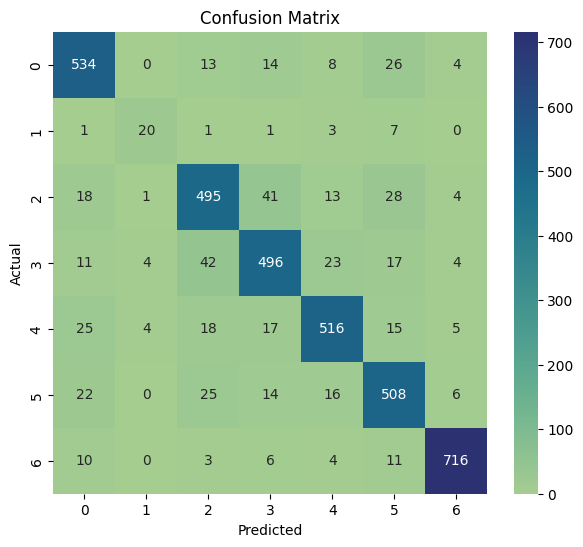

In [46]:
import matplotlib.pyplot as plt
import seaborn as sb

mx = [[0 for i in range(7)] for j in range(7)]
for i in range(len(y_test)):
  mx[y_test[i]][y_pred[i]] += 1

plt.subplots(figsize=(7, 6))
sb.heatmap(mx, cmap="crest", annot = True, fmt = 'g')
plt.xlabel(f"Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix")
plt.show()